# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [115]:
#Write your code here, You may need to use python open() function to open the file and load data.
import pandas as pd 
import json
import matplotlib.pyplot as plt


In [116]:
X = open('/content/yearinfo.json')
yearinfo = json.load(X)
print(yearinfo)

{'2010': [{'band_singer': ['Kesha'], 'song': ['/wiki/Tik_Tok_(song)'], 'songurl': ['Tik Tok (song)'], 'ranking': 1, 'titletext': '"Tik Tok"', 'url': ['/wiki/Kesha']}, {'band_singer': ['Lady Antebellum'], 'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], 'songurl': ['Need You Now (Lady Antebellum song)'], 'ranking': 2, 'titletext': '"Need You Now"', 'url': ['/wiki/Lady_Antebellum']}, {'band_singer': ['Train (band)'], 'song': ['/wiki/Hey,_Soul_Sister'], 'songurl': ['Hey, Soul Sister'], 'ranking': 3, 'titletext': '"Hey, Soul Sister"', 'url': ['/wiki/Train_(band)']}, {'band_singer': ['Katy Perry', 'Snoop Dogg'], 'song': ['/wiki/California_Gurls'], 'songurl': ['California Gurls'], 'ranking': 4, 'titletext': '"California Gurls"', 'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']}, {'band_singer': ['Usher (musician)', 'Will.i.am'], 'song': ['/wiki/OMG_(Usher_song)'], 'songurl': ['OMG (Usher song)'], 'ranking': 5, 'titletext': '"OMG"', 'url': ['/wiki/Usher_(musician)', '/wiki/Will.i.am']}, 

In [117]:
yearinfo.keys()   #displaying the keys from dictionary

dict_keys(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])

In [118]:
len(yearinfo) # checking the length of yearinfo


12

In [119]:
yearinfo['2010'][0].keys() #checking the name of column

dict_keys(['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url'])

In [120]:
yearinfo['2010'][0].values() #checking the format of the values that are stored in the first index

dict_values([['Kesha'], ['/wiki/Tik_Tok_(song)'], ['Tik Tok (song)'], 1, '"Tik Tok"', ['/wiki/Kesha']])

### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

![image-3.png](attachment:image-3.png)

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [121]:
#write your code here

yearinfo_list = [] #creating list
for key, values in yearinfo.items(): #Prasing tuple
  for i in values:
    yearinfo_list.append(list(i.values()) + [key])




In [122]:
df = pd.DataFrame(yearinfo_list) #creating dataframe


In [123]:
df.columns = ['band_singer','song','songurl','ranking','titletext','url','year']
df.head() 

band_singer                                         song  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [124]:
df.isna().sum() #checking null values

band_singer    0
song           0
songurl        0
ranking        0
titletext      0
url            0
year           0
dtype: int64

In [125]:
df.shape  #checking the number of rows and column

(1200, 7)

In [126]:
df.dtypes #checking the datatype of each columns

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year           object
dtype: object

In [127]:
df.year = df.year.astype('int')  #changing datatypeof year 

In [128]:
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year            int64
dtype: object

In [129]:
df.head() #printing the first 5 data 

band_singer                                         song  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [130]:
#function to enter the datapoint in the formated value in the dataset
def fetch_list_value(list_name):
    value = list_name[0]
    return value




In [131]:
#datapoint which need to be enter in proper formated value.
df['band_singer'] = df.band_singer.map(fetch_list_value)
df['song'] = df.song.map(fetch_list_value)
df['songurl'] = df.songurl.map(fetch_list_value)
df['url'] = df.url.map(fetch_list_value)

In [132]:
df.head()

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  
0             /wiki/Kesha  2010  
1   /wiki/Lady_Antebellum  2010  
2      /wiki/Train_(band)  2010  
3        /wiki/Katy_Perry  2010  
4  /wiki/Usher_(musician)  2010

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [133]:
#Write your program and plot bar graph

singer = df.band_singer[:]
singer

0                  Kesha
1        Lady Antebellum
2           Train (band)
3             Katy Perry
4       Usher (musician)
              ...       
1195       Lainey Wilson
1196            BRS Kash
1197            Rod Wave
1198          Chase Rice
1199      Rauw Alejandro
Name: band_singer, Length: 1200, dtype: object

In [134]:
# singers those who appeared at-least more than 15 times
quality_band = df.band_singer.value_counts()[df.band_singer.value_counts().values>=15]
quality_band

Drake (musician)    26
Maroon 5            21
Rihanna             21
Ariana Grande       20
Taylor Swift        19
The Weeknd          16
Name: band_singer, dtype: int64

Text(0, 0.5, 'Frequencies')

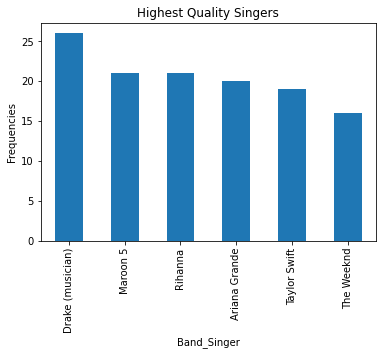

In [135]:
# It will show the result of most apperance at-least or more than 15 times
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.DataFrame(quality_band)
data['band_singer'].plot(kind="bar")
plt.title("Highest Quality Singers")
plt.xlabel("Band_Singer")
plt.ylabel("Frequencies")

Question: Who is the most profilic 


ANS: From the above graph, we can conclude that Drake(musician) is the highest singer among other singer which appeared 26 times


### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [136]:
##write your code here
#df['score'] = [101-i for i in df['ranking']]
#df.head()
import seaborn as sns # Data visualization for high-level interface for drawing attractive and informative statistical graphics.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


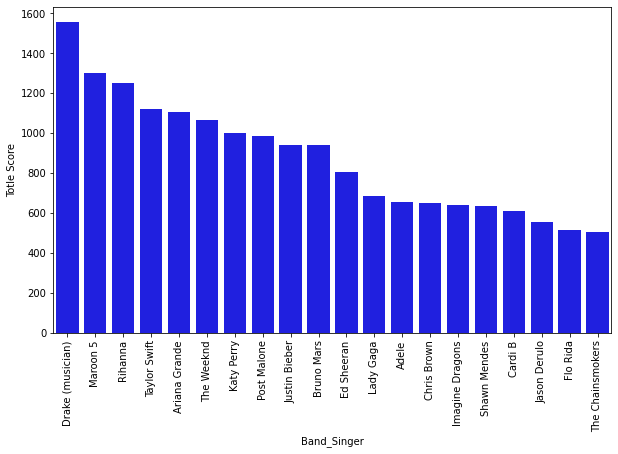

In [137]:
df['totle_score'] = 101 - df['ranking']

new_ranking = df.groupby('band_singer').totle_score.sum().sort_values(ascending = False)
top_20 = new_ranking.head(20)

f = plt.figure(figsize = (10,6), frameon = False)
sns.barplot(top_20.index, top_20.values, color = 'blue')
plt.xticks(rotation=90)
plt.xlabel('Band_Singer')
plt.ylabel('Totle Score');

**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

Yes, there is difference in position where singer in 4th place is change. It happend because the number in the first graph lable was base on number of apperence of the siger name but in the second graph it was base on the totle score of a singer.

## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

To find the highest ranked singer in a particular year?

In [138]:
new_data = df[['band_singer','ranking','year']] #creating new dataframe
#grouping by year
new_yr = new_data.groupby('year')
#selecting particular year
yr = new_yr.get_group(2021)
#finding the highest ranked 
highest_ranked = yr['band_singer'].value_counts(sort = True)[:5]
highest_ranked


Drake (musician)       5
Olivia Rodrigo         4
Doja Cat               4
Justin Bieber          4
Megan Thee Stallion    3
Name: band_singer, dtype: int64

In [142]:
year_2021 = pd.DataFrame(highest_ranked)
year_2021

band_singer
Drake (musician)               5
Olivia Rodrigo                 4
Doja Cat                       4
Justin Bieber                  4
Megan Thee Stallion            3

Text(0, 0.5, 'Ranking')

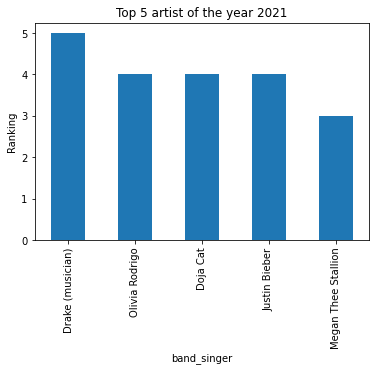

In [145]:
#write your solution from here
year_2021['band_singer'].plot(kind = 'bar')
plt.title("Top 5 artist of the year 2021")
plt.xlabel('band_singer')
plt.ylabel('Ranking')

## SUBMISSION DATE: 2nd April 2022 